In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [35]:
ls

 Volume in drive G is New Volume
 Volume Serial Number is AAA4-0BD0

 Directory of G:\Sanit_Horizontal\Data Analysis\Dharin Project files\Friction Measurement Issues

26-12-2022  18:32    <DIR>          .
26-12-2022  18:32    <DIR>          ..
26-12-2022  18:08    <DIR>          .ipynb_checkpoints
18-12-2022  20:15        31,206,173 _30N_Vel.xlsx
18-12-2022  20:15        40,199,211 _40N_Vel.xlsx
18-12-2022  20:15        36,293,735 _50N_Vel.xlsx
19-12-2022  17:18           466,220 30N cleaner.ipynb
18-12-2022  20:15        17,990,829 30N.pkl
19-12-2022  17:19         6,042,869 30N_cycle_data.pkl
18-12-2022  20:15         8,536,764 30N_Od_removed.pkl
19-12-2022  17:18         6,049,478 30N_Od_removed_corrected.pkl
26-12-2022  17:30    <DIR>          30N_plots
18-12-2022  20:15        19,296,071 40N.pkl
19-12-2022  16:03         8,276,641 40N_cycle_data.pkl
18-12-2022  20:15         8,284,975 40N_Od_removed.pkl
19-12-2022  09:27    <DIR>          40N_plots
26-12-2022  18:32           872,

In [36]:
if (not bool(os.path.isdir('50N_plots') )):
    
    os.mkdir('50N_plots')

In [37]:
dict = pd.read_pickle('50N_cycle_reg_final.pkl')

In [38]:
dict.keys()

dict_keys(['1kmph', '1.5kmph', '3kmph', '4kmph', '5kmph', '6kmph', '7kmph', '8kmph', '9kmph', '10kmph', '15kmph', '20kmph'])

In [39]:
dict['3kmph'].keys()

dict_keys(['vel', 'T_cor', 'F_lever', 'T_SG', 'press', 'temp', 'pos', 'mu'])

# Saving Plots 

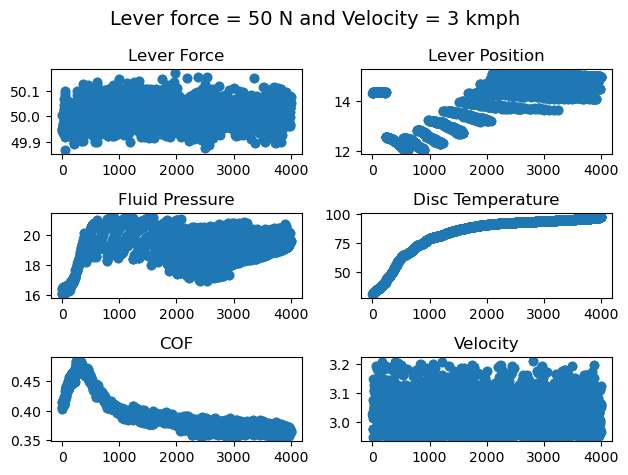

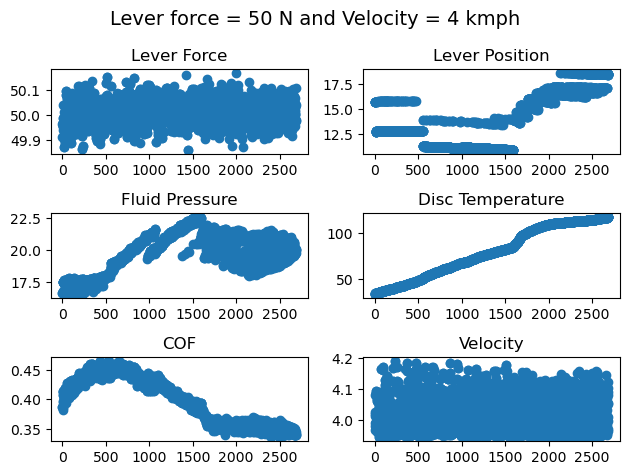

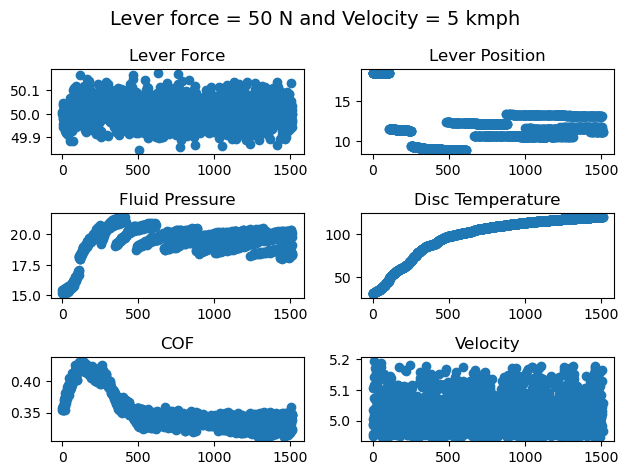

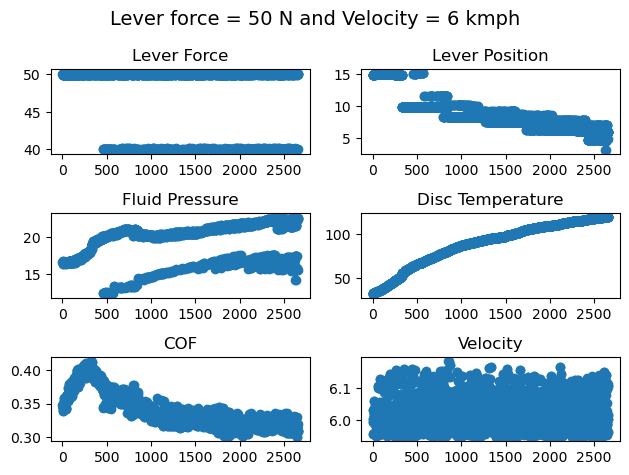

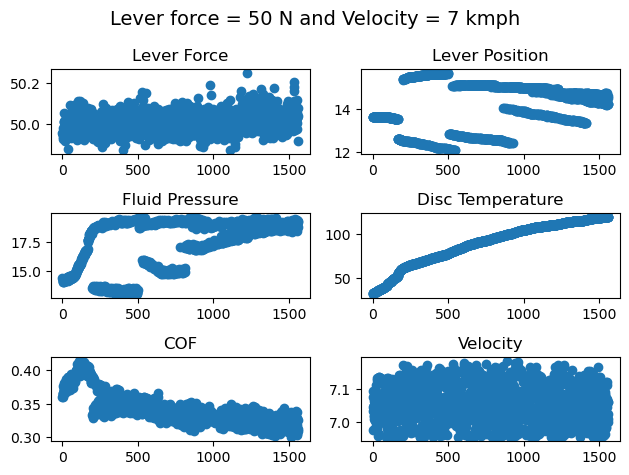

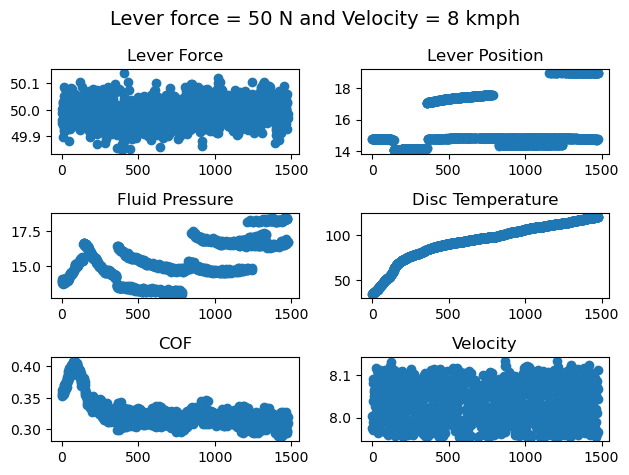

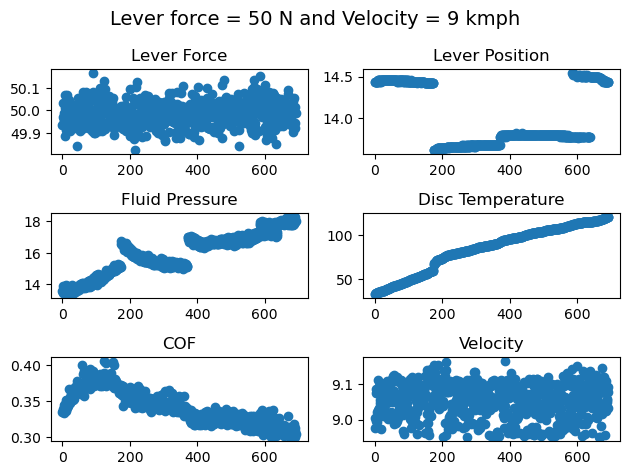

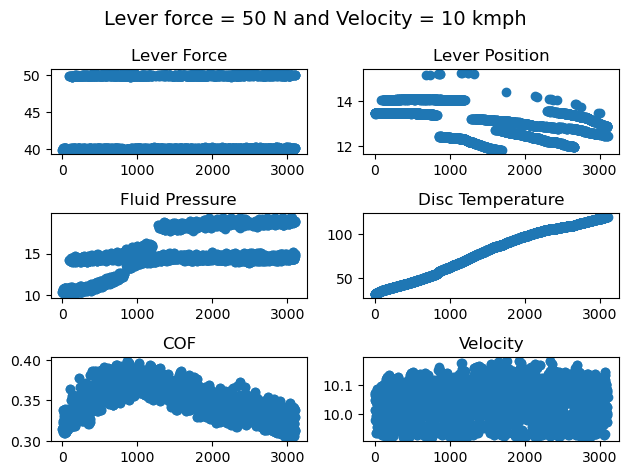

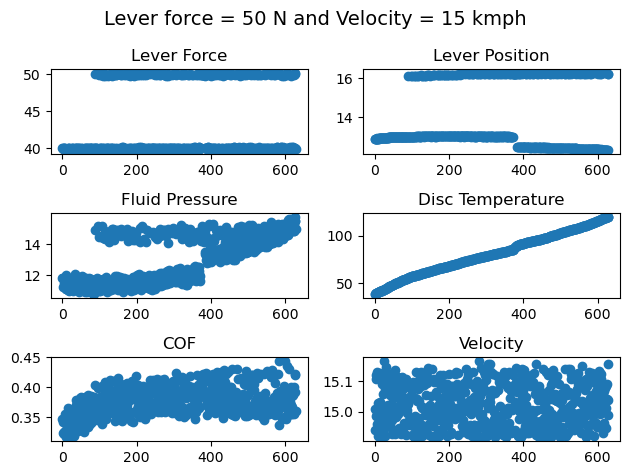

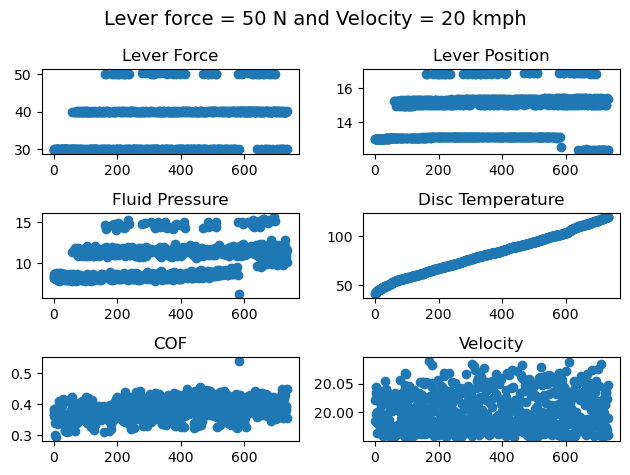

In [40]:
for i in np.arange(2,len(dict),1):
    
    # Reading the dataset
    data = pd.DataFrame(dict[list(dict.keys())[i]])

    # Setting the name of the file
    speed = data['vel'].max()
    force = data['F_lever'].max()

    # Initialise the subplot function using number of rows and columns
    figure, axis = plt.subplots(3, 2)

    # For Lever Force
    axis[0, 0].scatter(np.arange(0,len(data),1),data['F_lever'])
    axis[0, 0].set_title("Lever Force")

    # Lever Position
    axis[0, 1].scatter(np.arange(0,len(data),1),data['pos'])
    axis[0, 1].set_title("Lever Position")

    # For Fluid Pressure
    axis[1, 0].scatter(np.arange(0,len(data),1),data['press'])
    axis[1, 0].set_title("Fluid Pressure")

    # For Disc Temperature
    axis[1,1].scatter(np.arange(0,len(data),1),data['temp'])
    axis[1,1].set_title("Disc Temperature")

    # For Velocity
    axis[2,1].scatter(np.arange(0,len(data),1),data['vel'])
    axis[2,1].set_title("Velocity")
    
    data['mu']

    # For Coefficient of Friction
    axis[2,0].scatter(np.arange(0,len(data),1),data['mu'])
    axis[2,0].set_title("COF")


    plt.suptitle(f'Lever force = {int(force)} N and Velocity = {int(speed)} kmph', fontsize=14)

    figure.tight_layout()

    # Combine all the operations and display
    plt.savefig(f'50N_plots/{int(force)}_{int(speed)}.jpg',dpi=128)
    plt.show()

In [41]:
data.head()

,vel,T_cor,F_lever,T_SG,press,temp,pos,mu
0,19.9844,80.0878,30.0107,100.5536,8.137,40.7952,12.98,0.368917
1,20.0220,79.1469,29.9693,108.4245,8.475,41.3350,12.98,0.381929
2,19.9965,81.4556,29.9480,99.0055,8.206,41.4646,13.00,0.360183
3,20.0438,79.9664,29.8840,109.9666,8.641,41.8189,13.00,0.379920
4,20.0328,81.7398,29.8733,85.1892,8.487,42.3091,13.00,0.299658
